# Chapter 1: DATA

[Link to outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.sxp5yrohv0ad)

Concept map:
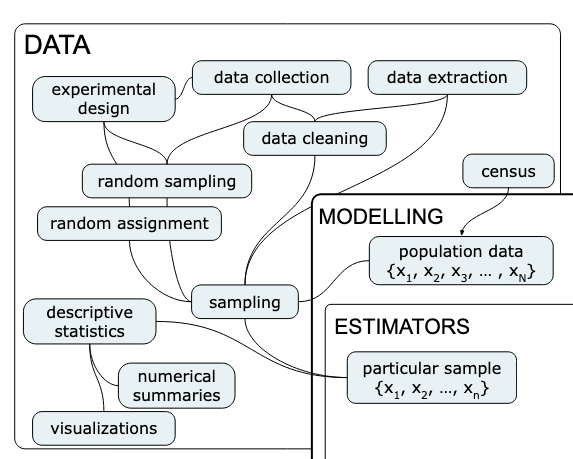



## 1.1 Introduction to data

Data is the fuel for stats (see [section outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.bt6jrc2adg0z) for more details).


## 1.2 Data in practice

Before it can be used in statisical analyses, data often requires pre-processing steps which are can like extract, transform, and load (ETL) as shows below:

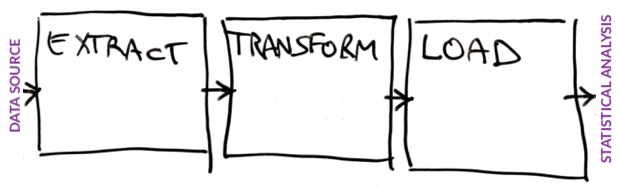


We'll illustrate these steps based on the data for Amy's research:
- Extract data from spreadhseet file using `read_excel`
- Transform to tidy format using `melt`, cleanup, then save data as a CSV file
- Load data again using `read_csv` to make sure all good



#### Notebook setup

In [1]:
# We begin by importing some Python libraries for data analysis and plotting

# import necessary modules:
import pandas as pd    # data manipulations
import seaborn as sns  # plotting and visualizations

# notebook and figures setup:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,5)})

# silence annoying warnings
import warnings; warnings.filterwarnings('ignore')

### Extract
We can use the function `read_excel` in the `pandas` module, which have imported as the shorter alias `pd` to extract the data the sheet named "Data" in the spreadhseet file.

In [2]:
rawdf = pd.read_excel("data/employee_lifetime_values_records.ods", sheet_name="Data")

# if you get an error on the above line, run this instead:
# rawdf = pd.read_excel("https://github.com/minireference/noBSstatsnotebooks/raw/main/data/employee_lifetime_values_records.ods", sheet_name="Data")

rawdf.loc[18,"Group S"] = rawdf.loc[18,"Group S"]+5

# the data extracted from the spreadsheet is now stored in rawdf, a pd.DataFrame object
rawdf

,Group NS,Group S
0,923.87,1297.44
1,751.38,776.41
2,432.83,1207.48
3,1417.36,1203.30
4,973.24,1127.58
5,1000.52,1464.32
6,1040.38,926.94
7,1324.41,1550.08
8,1171.52,1111.03
9,1195.03,1057.69


Note there is a missing value (denoted `NaN`) in the last row of **Group S**. We'll have to fix that in the data-cleaning step later on.

In [3]:
# the "shape" of the dataframe is
rawdf.shape

(31, 2)

In [4]:
# we can quickly see the statistics for the two groups
rawdf.describe()

,Group NS,Group S
count,31.000000,30.000000
mean,1018.411290,1148.435000
std,265.815869,233.037704
min,432.830000,623.060000
25%,858.775000,1022.137500
50%,990.130000,1119.305000
75%,1183.275000,1279.882500
max,1620.930000,1716.610000


The above table contains some useful summary for the two groups in the data. We can confirm we have 31 data points for **Group NS**, 30 data points for **Group S** and see all the descriptive statistics like mean, standard deviation, min/max, and the quartiles (more on that later).

---

### Observed difference in means in the data sample

As a form of sanity check, let's compute the difference in means in the data sample we have roughly corresponds to the "groud truth" difference in means.

In [5]:
# sample mean for Group S
xbarS = rawdf['Group S'].mean()
print("The average ELV in Group S is", xbarS)

# sample mean for Group NS
xbarNS = rawdf['Group NS'].mean()
print("The average ELV in Group NS is", xbarNS)

# compute d, the difference in ELV means between two groups
dmeans = xbarS - xbarNS
print("The difference between groups means is", dmeans)

The average ELV in Group S is 1148.435
The average ELV in Group NS is 1018.4112903225806
The difference between groups means is 130.02370967741933


Will do all of stats in 20 minutes. Go get coffee if needed, because this is going to be intense! Are you ready for this?

### Transform and clean the raw data

- Currently data is in a "wide" format (block where each row contains multiple observations)
- Instead, we prefer all data to be in "tall" format where each row is a single observation

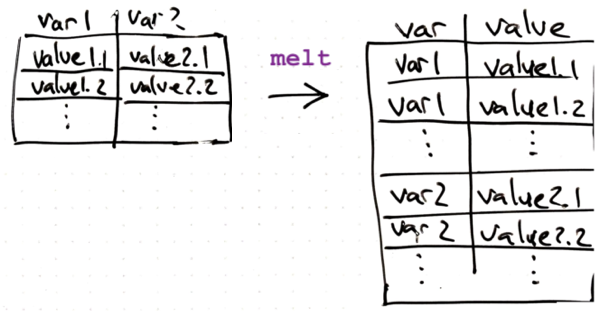

The operation to convert is called `melt` and there is a Python method for the same name:

In [6]:
# before melt...
# rawdf

In [7]:
tmpdf1 = rawdf.melt(var_name="group", value_name="ELV")

# ...after melt
tmpdf1

,group,ELV
0,Group NS,923.87
1,Group NS,751.38
2,Group NS,432.83
3,Group NS,1417.36
4,Group NS,973.24
...,...,...
57,Group S,1329.68
58,Group S,1293.03
59,Group S,1240.44
60,Group S,1105.59


In [8]:
# lets use short labels...
tmpdf2 = tmpdf1.replace({"Group NS": "NS", "Group S": "S"})
tmpdf2

,group,ELV
0,NS,923.87
1,NS,751.38
2,NS,432.83
3,NS,1417.36
4,NS,973.24
...,...,...
57,S,1329.68
58,S,1293.03
59,S,1240.44
60,S,1105.59


In [9]:
# clean data (remove NaN values)
df = tmpdf2.dropna()
df

,group,ELV
0,NS,923.87
1,NS,751.38
2,NS,432.83
3,NS,1417.36
4,NS,973.24
...,...,...
56,S,931.61
57,S,1329.68
58,S,1293.03
59,S,1240.44


In [10]:
# let's save to disk
df.to_csv('data/employee_lifetime_values.csv', index=False)

In [11]:
# !du data/employee_lifetime_values.csv
# !head data/employee_lifetime_values.csv

In [12]:
# Let's try loading the data again using `read_csv` to make sure it is the same
df = pd.read_csv('data/employee_lifetime_values.csv')
df

,group,ELV
0,NS,923.87
1,NS,751.38
2,NS,432.83
3,NS,1417.36
4,NS,973.24
...,...,...
56,S,931.61
57,S,1329.68
58,S,1293.03
59,S,1240.44


The dataframe `df` is now in long format and this will make doing stats and plotting much easier from now on.

Data cleaning and data munging are important prerequisites for any statistical analysis. We've only touched the sufrace here, but it's important for you to know these steps exist, and are often the most time consuming part of any "data job."

### pandas sidenote: selecting subsets


In [13]:
# first create a boolean "mask" of rows that match
# df["group"] == "S"

In [14]:
# selects subset that corresponds to the mask
# df[df["group"]=="S"]  

## 1.3 Descriptive statistics

- Use `.describe()` to get summary statistics
- Draw a histogram
- Draw a boxplot


In [15]:
df[df["group"]=="NS"].describe()

,ELV
count,31.000000
mean,1018.411290
std,265.815869
min,432.830000
25%,858.775000
50%,990.130000
75%,1183.275000
max,1620.930000


In [16]:
df[df["group"]=="S"].describe()

,ELV
count,30.000000
mean,1148.435000
std,233.037704
min,623.060000
25%,1022.137500
50%,1119.305000
75%,1279.882500
max,1716.610000


In [17]:
# another way to do this
df.groupby('group').describe()

ELV                                                                  \
      count        mean         std     min        25%       50%        75%   
group                                                                         
NS     31.0  1018.41129  265.815869  432.83   858.7750   990.130  1183.2750   
S      30.0  1148.43500  233.037704  623.06  1022.1375  1119.305  1279.8825   

                
           max  
group           
NS     1620.93  
S      1716.61

### Visualizations

<AxesSubplot:xlabel='ELV', ylabel='group'>

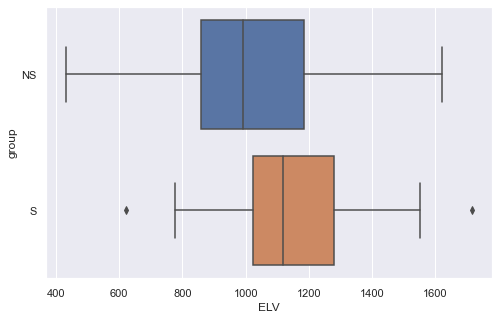

In [18]:
sns.boxplot(data=df, x="ELV", y="group")

<AxesSubplot:xlabel='ELV', ylabel='group'>

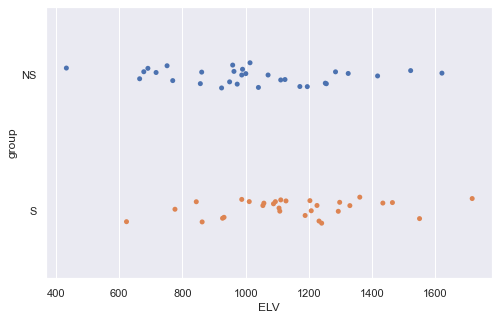

In [19]:
sns.stripplot(data=df, x="ELV", y="group")

<AxesSubplot:xlabel='ELV', ylabel='Count'>

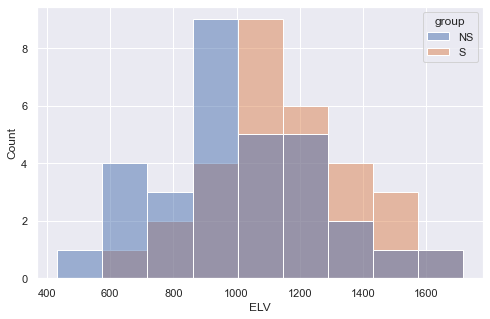

In [20]:
sns.histplot(data=df, x="ELV", hue="group")

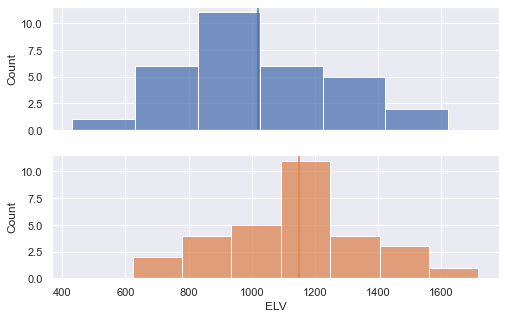

In [21]:
# better histplot
fig, axes = plt.subplots(2, 1, sharex=True)
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]
sns.histplot(data=df[df["group"]=="NS"], x="ELV", color=blue, ax=axes[0])
axes[0].axvline(df[df["group"]=="NS"].mean().values[0], 0, 12)

sns.histplot(data=df[df["group"]=="S"], x="ELV", color=orange, ax=axes[1])
axes[1].axvline(df[df["group"]=="S"].mean().values[0], 0, 12, color=orange)

In [22]:
meanNS = df[df["group"]=="NS"].mean().values[0]
meanS = df[df["group"]=="S"].mean().values[0]

stdNS = df[df["group"]=="NS"].std().values[0]
stdS = df[df["group"]=="S"].std().values[0]
print("Standard deviation of the two groups", stdNS, stdS)

d = meanS - meanNS
d

Standard deviation of the two groups 265.81586903646837 233.03770419738134


130.02370967741933

### Summary 

- reminder: goals is to determine if stats training leads to meaningful ELV increase
- numerically and visually, we see that employees who received stats training (Group B) have higher ELV,
  but could the observed difference be just a fluke?
- facts: the observed difference in means is `d` = $\overline{x}_S - \overline{x}_{NS} = 130$
  and the standard deviation of the sample is 266 and 233 respectively.
  Is a difference of 130 (signal) significant for data with variability ~250 (noise)?


## Discussion

- the data samples we have collected contain A LOT of variability
- we need to develop a language for describing variability (probability theory)
- we can use probability theory for modeling data and considering hypothetical scenarios


Learning the language of probability theory will help us rephrase the research questions as precise mathematical problems:

1. Does statistical training make a difference in ELV?  
   We'll define a probability model for a hypothetical situation where statistics training
   makes no difference and calculate how likely it is to observe the difference $d= \overline{x}_S - \overline{x}_{NS} = 130$ between two groups due to chance.
2. How big is the increase in ELV that occurs thanks to stats training?  
   We'll **produce an estimate** of the difference in ELV between groups
   that takes into account the variability of the data.


### Next step

Ready for an intro to probability theory?
If so, move on to the next notbeook [02_PROB.ipynb](./02_PROB.ipynb).